In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\00jupters-notebook\Task_Nti\Data\cars_data.csv")
df.head()

,Brand,Year,Mileage,Engine_Size,Fuel_Type,Transmission,Previous_Owners,Price
0,Kia,2015.0,110373.0,2.5,Electric,Manual,2,3000.0
1,Mercedes,2010.0,186144.0,1.3,Electric,Manual,5,4844.0
2,Nissan,2018.0,29574.0,2.6,Petrol,Manual,1,6628.0
3,Kia,2010.0,139502.0,2.4,Diesel,Automatic,NaN,3000.0
4,BMW,2014.0,148748.0,3.5,Diesel,Manual,1,6451.0


---------
Data Cleaning
-----------

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            979 non-null    object 
 1   Year             974 non-null    float64
 2   Mileage          979 non-null    float64
 3   Engine_Size      964 non-null    float64
 4   Fuel_Type        982 non-null    object 
 5   Transmission     962 non-null    object 
 6   Previous_Owners  950 non-null    object 
 7   Price            987 non-null    float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [6]:
for col in df.select_dtypes(include='object'):
    print(col)
    

Brand
Fuel_Type
Transmission
Previous_Owners


In [7]:
df.isna().sum().sort_values(ascending=False)

Previous_Owners    50
Transmission       38
Engine_Size        36
Year               26
Mileage            21
Brand              21
Fuel_Type          18
Price              13
dtype: int64

In [8]:
df.dropna(subset=['Price'] , inplace=True)
df.reset_index(drop=True ,inplace=True)

In [9]:
df.isna().sum().sort_values(ascending=False)

Previous_Owners    42
Engine_Size        30
Transmission       25
Brand              21
Year               20
Mileage            15
Fuel_Type          12
Price               0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imput = SimpleImputer(strategy='most_frequent')
for col in ['Brand','Fuel_Type','Transmission','Previous_Owners']:
    df[[col]] = imput.fit_transform(df[[col]])


In [11]:
df.isna().sum().sort_values(ascending=False)

Engine_Size        30
Year               20
Mileage            15
Brand               0
Fuel_Type           0
Transmission        0
Previous_Owners     0
Price               0
dtype: int64

In [12]:
for col in ['Engine_Size','Year','Mileage']:
    print(col , df[col].skew())

Engine_Size -0.025065858089581002
Year 0.043916346723028195
Mileage -0.024839675465627983


In [13]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
for col in ['Engine_Size','Year','Mileage']:
    df[[col]] = imp.fit_transform(df[[col]])

In [14]:
df.isna().sum().sort_values(ascending=False)

Brand              0
Year               0
Mileage            0
Engine_Size        0
Fuel_Type          0
Transmission       0
Previous_Owners    0
Price              0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            987 non-null    object 
 1   Year             987 non-null    float64
 2   Mileage          987 non-null    float64
 3   Engine_Size      987 non-null    float64
 4   Fuel_Type        987 non-null    object 
 5   Transmission     987 non-null    object 
 6   Previous_Owners  987 non-null    object 
 7   Price            987 non-null    float64
dtypes: float64(4), object(4)
memory usage: 61.8+ KB


--------------
Data Encoding 
-----------

In [17]:
df['Previous_Owners'].unique()


array(['2', '5', '1', ' ', '3', '4'], dtype=object)

In [18]:
df['Previous_Owners'] = df['Previous_Owners'].replace(' ','0')

In [19]:
def str2int(data):
    return int(data)

df['Previous_Owners'] =df['Previous_Owners'].apply(str2int)

In [20]:
df['Previous_Owners'].unique()

array([2, 5, 1, 0, 3, 4])

In [21]:
# Brand
# Fuel_Type
# # Transmission
for col in ['Brand' , 'Fuel_Type' ,'Transmission']:
    print(col , df[col].unique())

Brand ['Kia' 'Mercedes' 'Nissan' 'BMW' 'Mazda' 'Honda' 'Hyundai' 'Toyota']
Fuel_Type ['Electric' 'Petrol' 'Diesel' 'Hybrid']
Transmission ['Manual' 'Automatic']


In [22]:
import warnings 
warnings.filterwarnings('ignore')

In [23]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in ['Transmission' , 'Fuel_Type']:
    df[col] = lb.fit_transform(df[[col]])
    

In [24]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(handle_unknown='ignore')
one_en = one.fit_transform(df[['Brand']]).toarray()

In [25]:
one_df = pd.DataFrame(one_en ,columns=one.get_feature_names_out(['Brand']) , index=df.index)
df = pd.concat([df,one_df],axis=1)

In [26]:
df.drop(['Brand'] , inplace=True , axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             987 non-null    float64
 1   Mileage          987 non-null    float64
 2   Engine_Size      987 non-null    float64
 3   Fuel_Type        987 non-null    int64  
 4   Transmission     987 non-null    int64  
 5   Previous_Owners  987 non-null    int64  
 6   Price            987 non-null    float64
 7   Brand_BMW        987 non-null    float64
 8   Brand_Honda      987 non-null    float64
 9   Brand_Hyundai    987 non-null    float64
 10  Brand_Kia        987 non-null    float64
 11  Brand_Mazda      987 non-null    float64
 12  Brand_Mercedes   987 non-null    float64
 13  Brand_Nissan     987 non-null    float64
 14  Brand_Toyota     987 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 115.8 KB


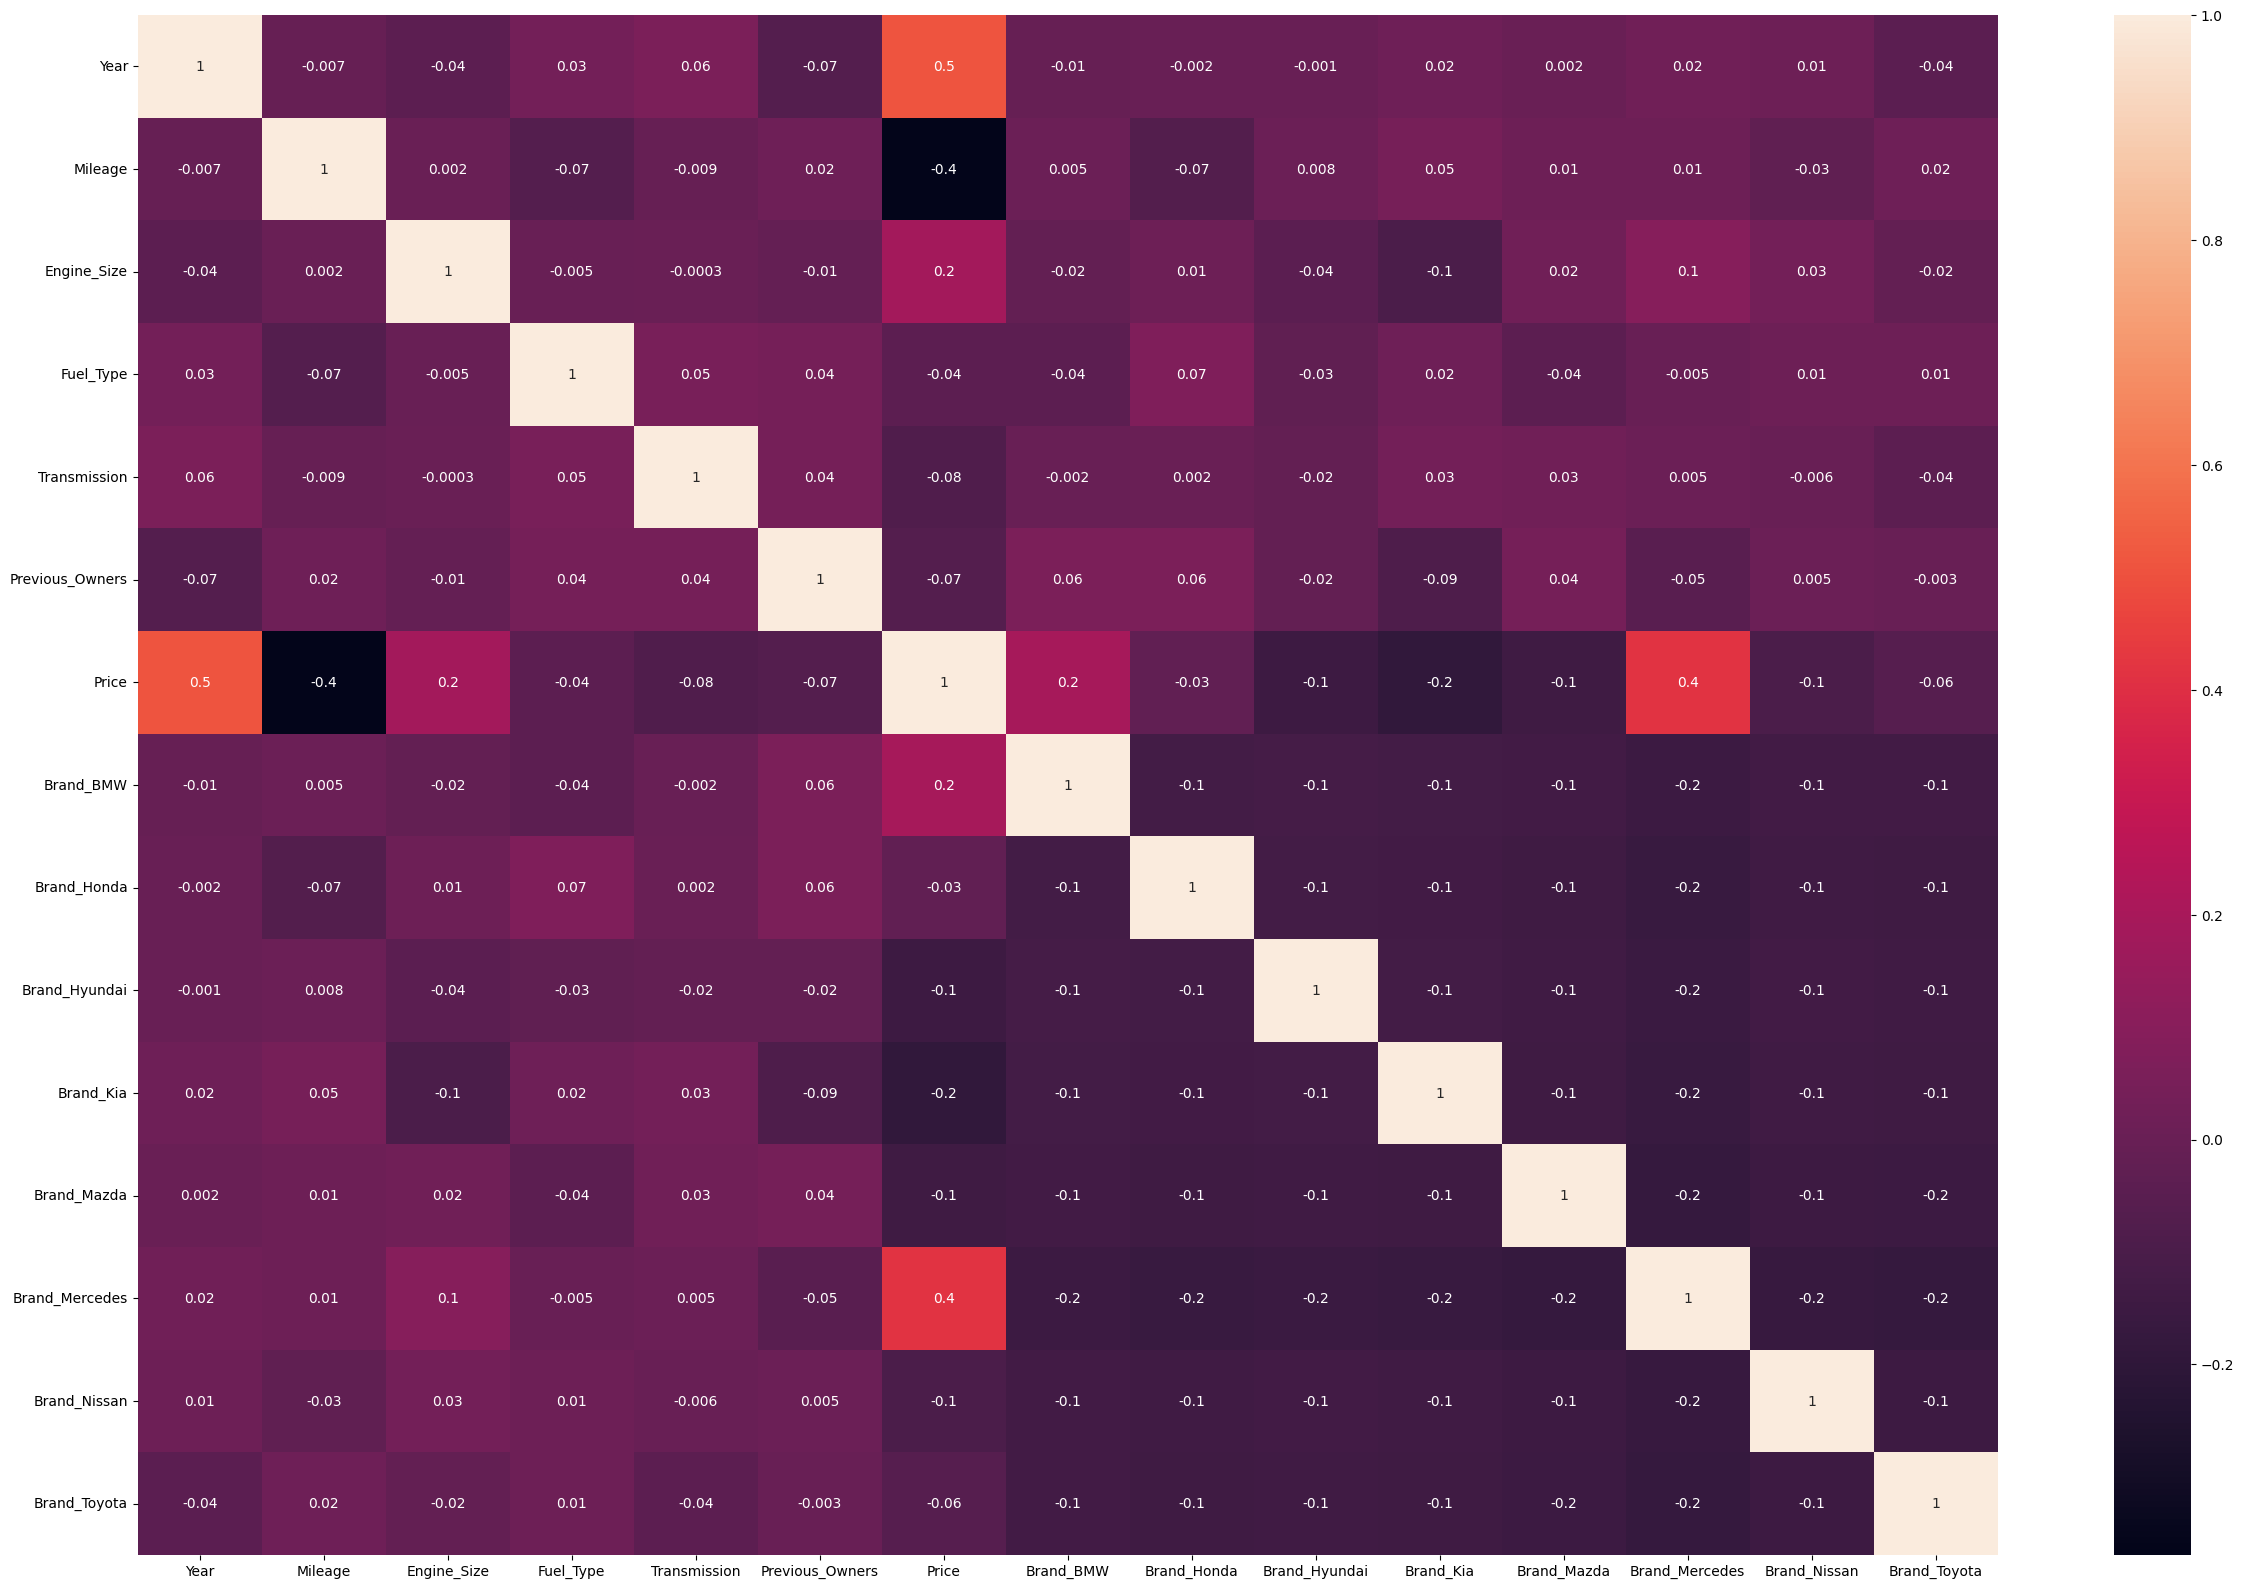

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True , fmt='0.1g')
plt.show()

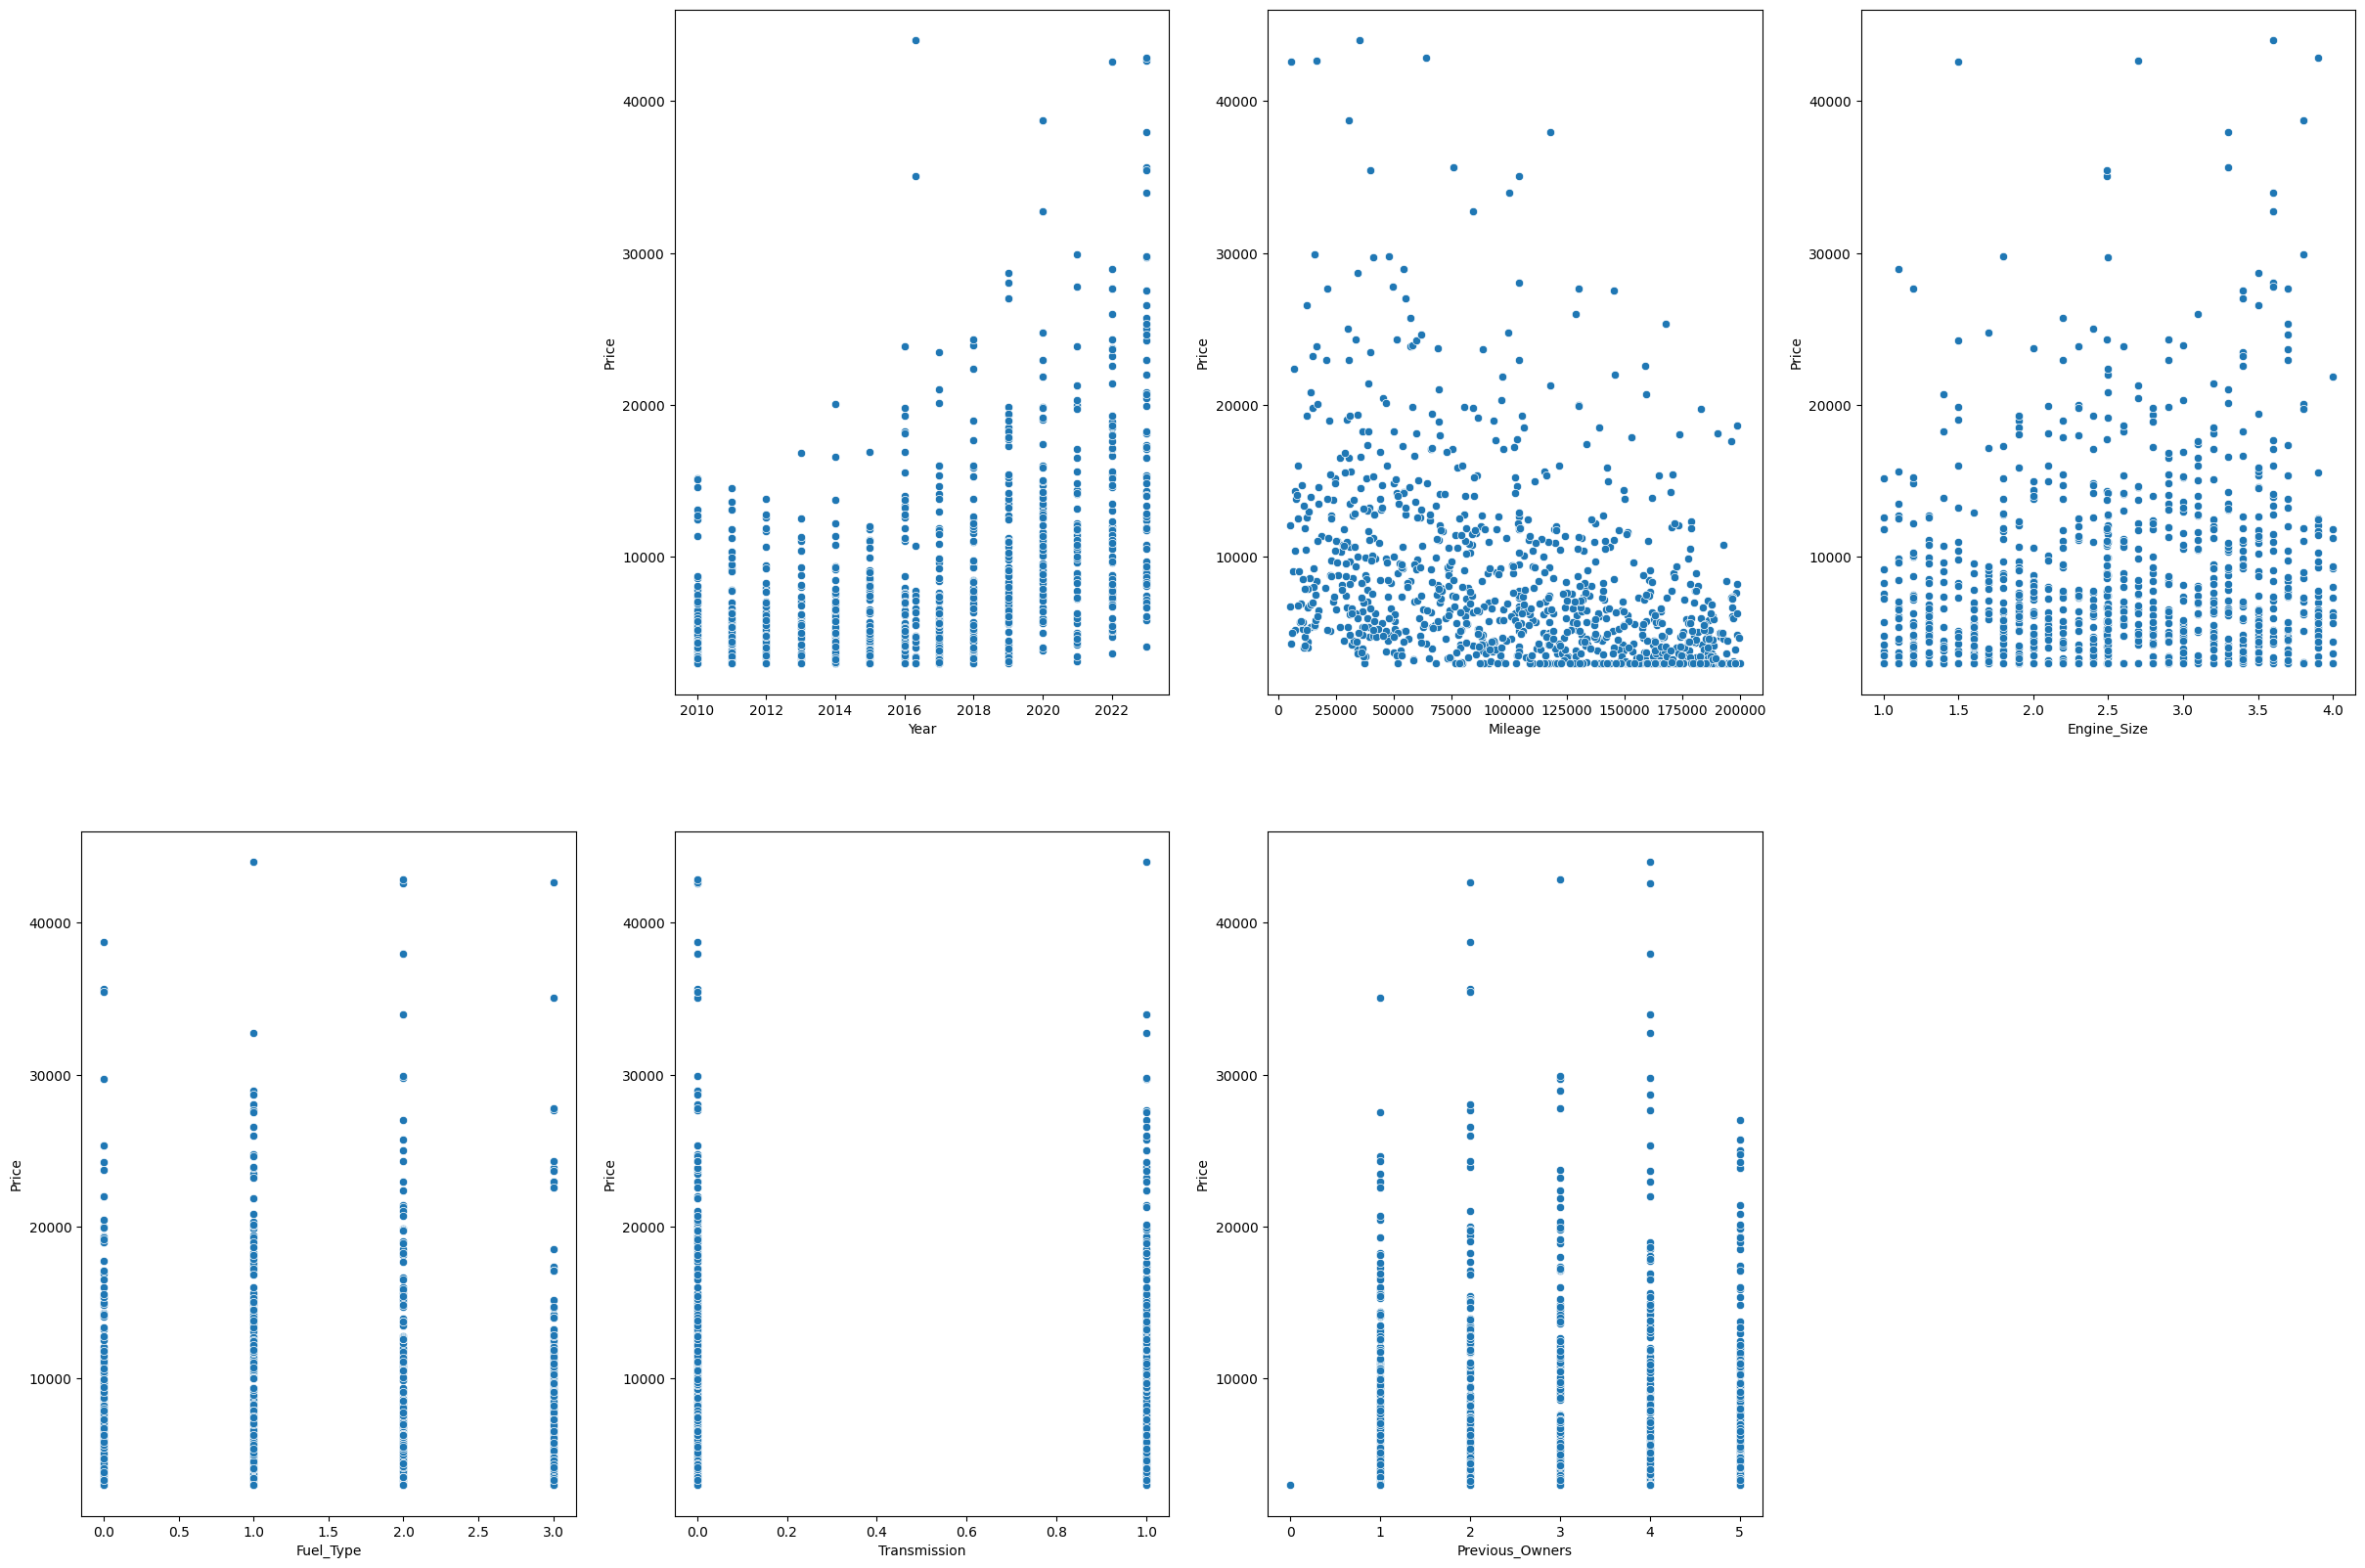

In [29]:
plt.figure(figsize=(30,20))

plt.subplot(2,4,2)
sns.scatterplot(data = df , x='Year',y='Price')
plt.subplot(2,4,3)
sns.scatterplot(data = df , x='Mileage',y='Price')
plt.subplot(2,4,4)
sns.scatterplot(data = df , x='Engine_Size',y='Price')
plt.subplot(2,4,5)
sns.scatterplot(data = df , x='Fuel_Type',y='Price')
plt.subplot(2,4,6)
sns.scatterplot(data = df , x='Transmission',y='Price')
plt.subplot(2,4,7)
sns.scatterplot(data = df , x='Previous_Owners',y='Price')
plt.show()

In [30]:
df.columns

Index(['Year', 'Mileage', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Previous_Owners', 'Price', 'Brand_BMW', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Kia', 'Brand_Mazda', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota'],
      dtype='object')

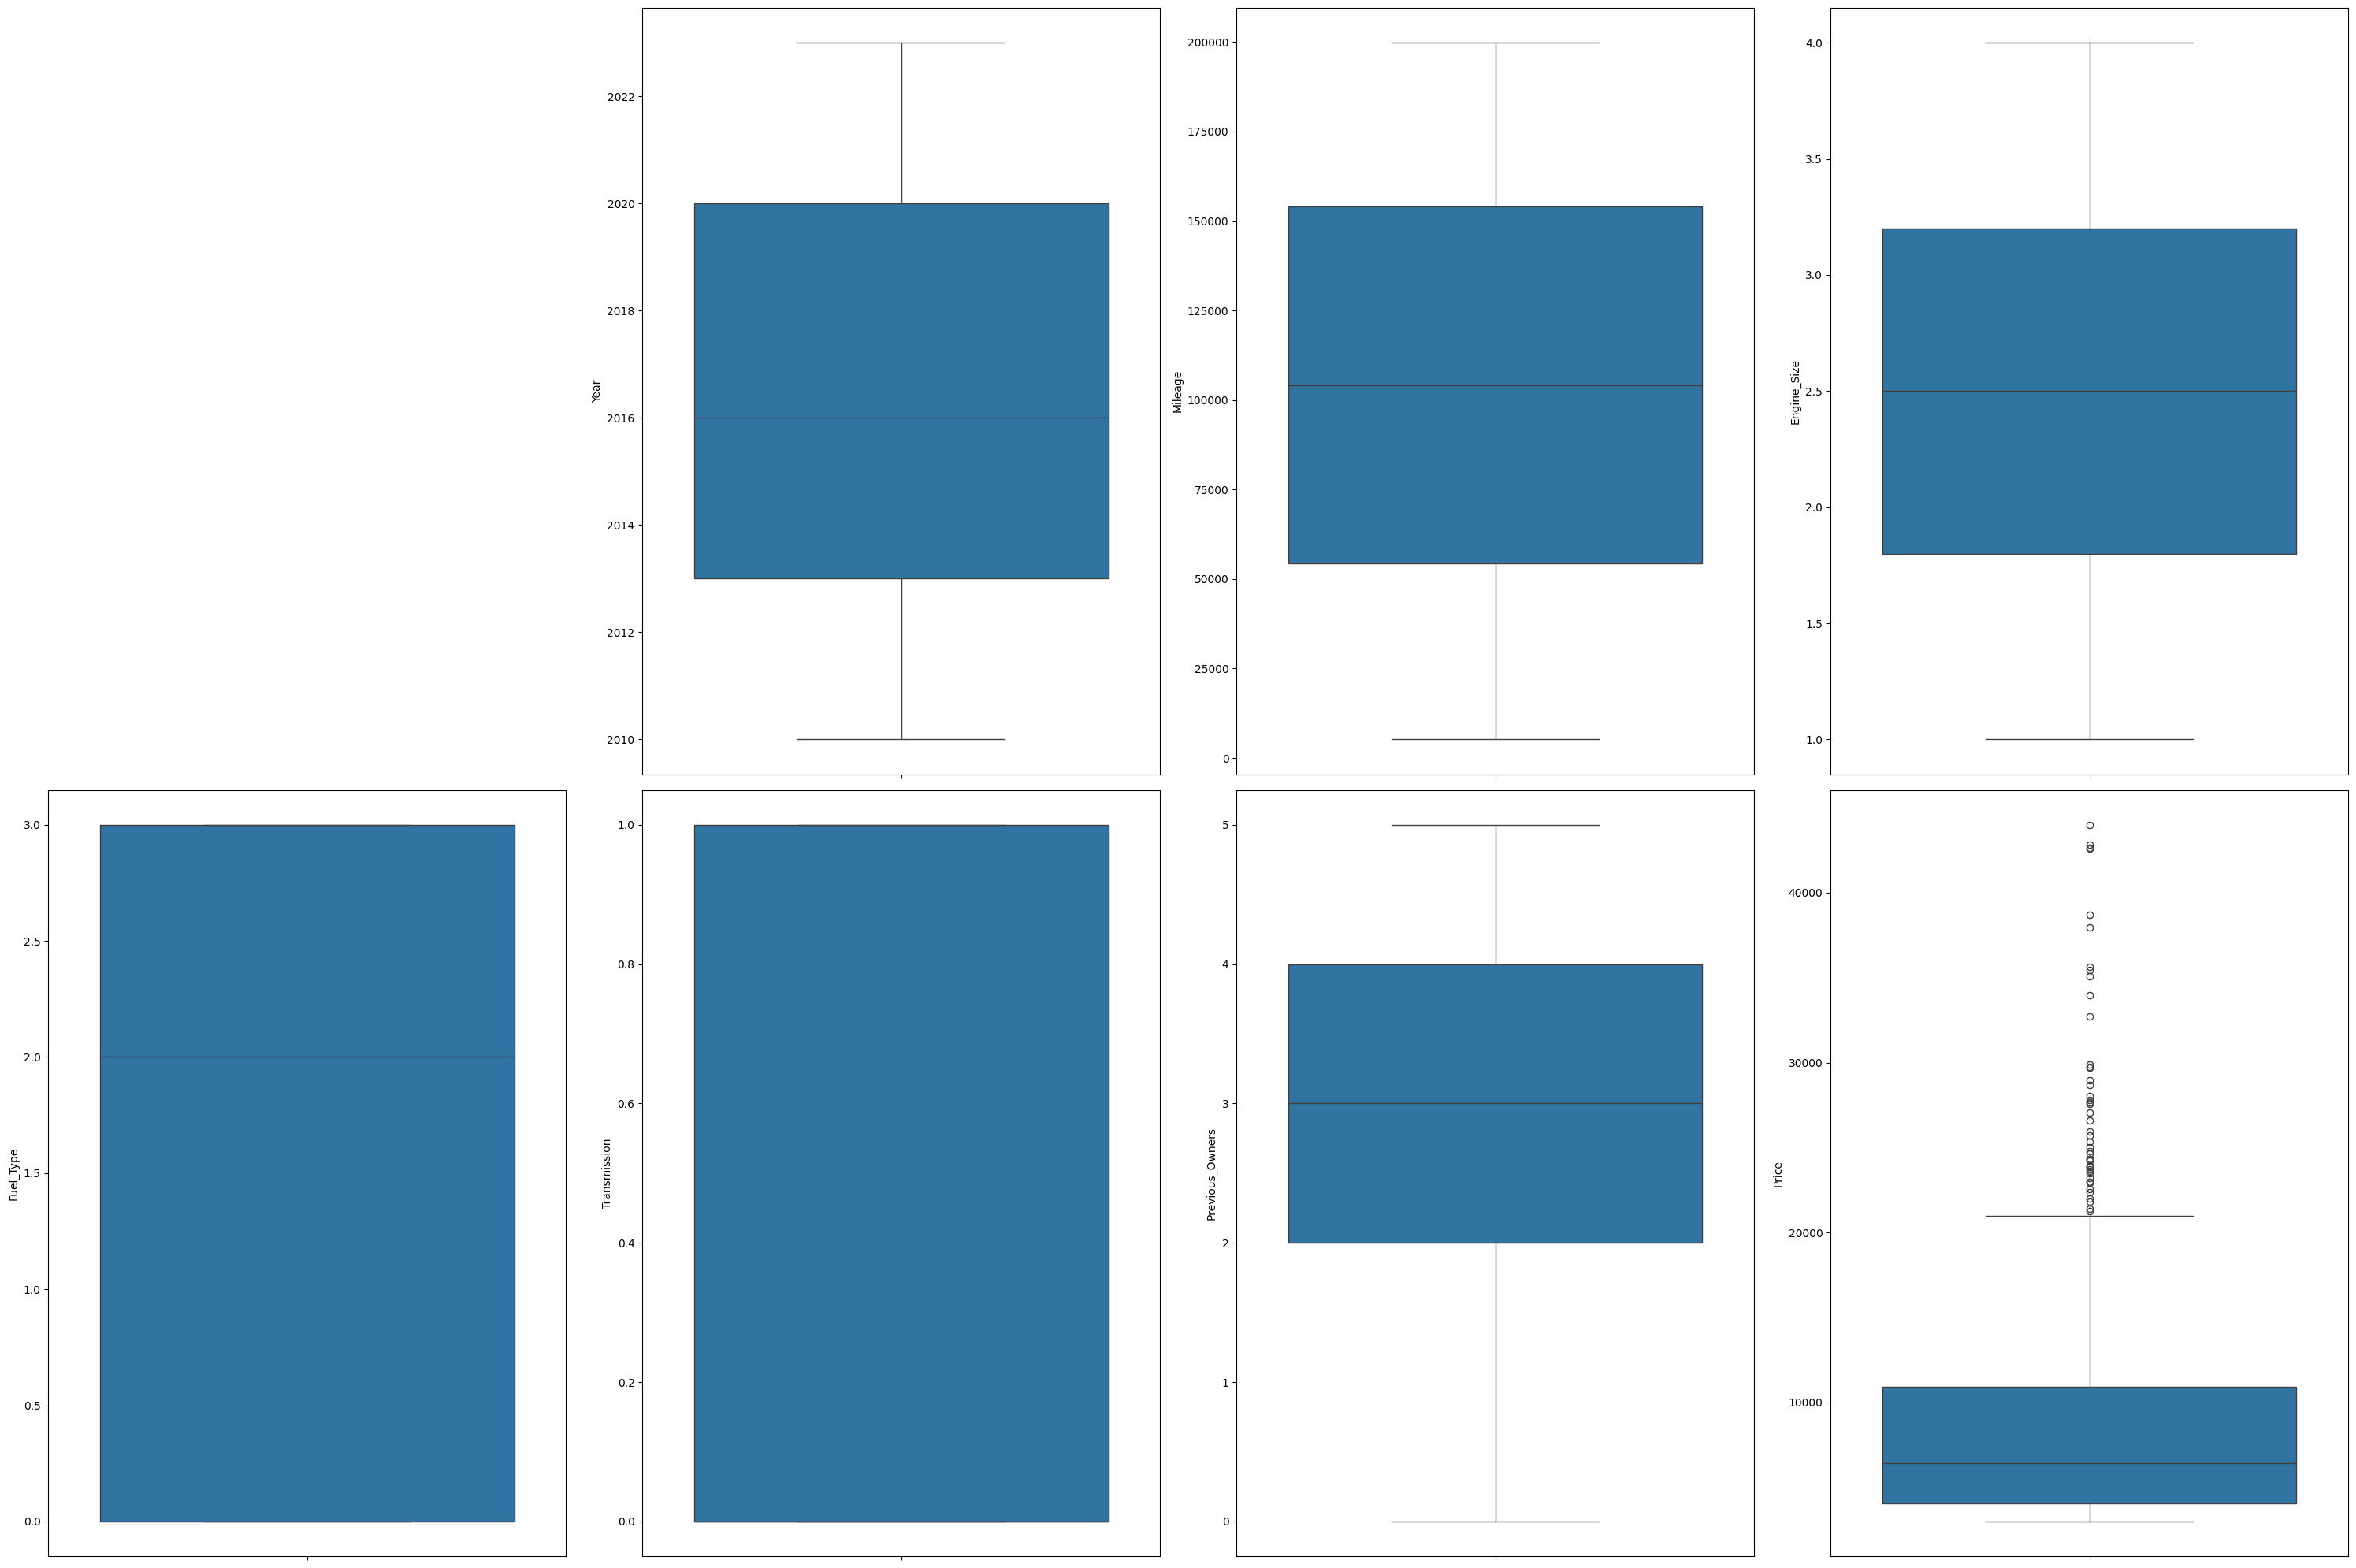

In [31]:
plt.figure(figsize=(30,20))


plt.subplot(2,4,2)
sns.boxplot(df['Year'])

plt.subplot(2,4,3)
sns.boxplot(df['Mileage'])


plt.subplot(2,4,4)
sns.boxplot(df['Engine_Size'])


plt.subplot(2,4,5)
sns.boxplot(df['Fuel_Type'])


plt.subplot(2,4,6)
sns.boxplot(df['Transmission'])


plt.subplot(2,4,7)
sns.boxplot(df['Previous_Owners'])
plt.subplot(2,4,8)
sns.boxplot(df['Price'])

plt.tight_layout()
plt.show()


---------
Delete Outliers
--------------

In [32]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1
df = df[(df['Price']>=q1-1.5*iqr)&(df['Price']<=q3+1.5*iqr)]

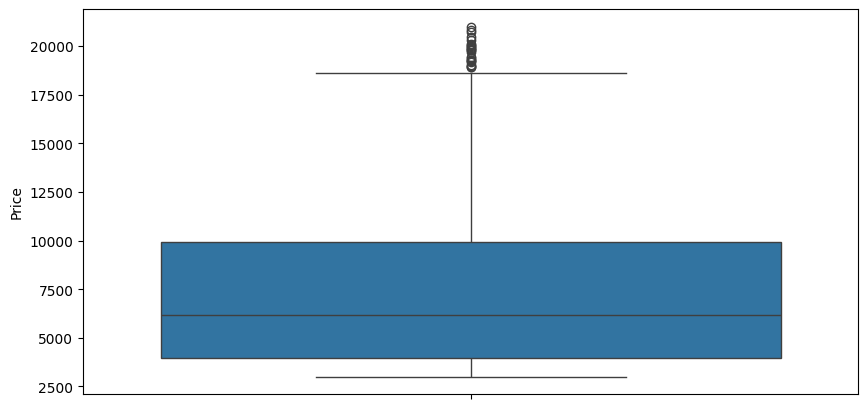

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Price'])
plt.show()

-------
Spiting Data 
--------

In [34]:
df.shape

(939, 15)

In [35]:
x = df.drop(['Price'] , axis=1)
y = df['Price']

In [36]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1 , random_state=48 , shuffle=True , stratify=None)

In [37]:
x_train.head()

,Year,Mileage,Engine_Size,Fuel_Type,Transmission,Previous_Owners,Brand_BMW,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mazda,Brand_Mercedes,Brand_Nissan,Brand_Toyota
463,2022.0,66272.0,3.6,0,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74,2023.0,65504.0,2.8,3,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
213,2023.0,32082.0,1.1,2,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
189,2023.0,186264.0,2.3,3,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
971,2020.0,11548.0,1.7,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
for col in ['Engine_Size','Previous_Owners']:
    x_train[col]=scaler.fit_transform(x_train[[col]])
    x_test[col] = scaler.transform(x_test[[col]])

In [39]:
st = StandardScaler()
for col in ['Year','Mileage']:
    x_train[col]=scaler.fit_transform(x_train[[col]])
    x_test[col] = scaler.transform(x_test[[col]])

---
Data Scilling
-------------

In [40]:
y_train.head()

463    17097.0
74     12420.0
213    12696.0
189     5831.0
971     7894.0
Name: Price, dtype: float64

------
Linear Regression
------------

In [41]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [42]:
y_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error , r2_score , root_mean_squared_error ,classification_report
print(f'mse {mean_squared_error(y_test , y_pred)}')
print(f'mae {mean_absolute_error(y_test , y_pred)}')
print(f'rmse {root_mean_squared_error(y_test , y_pred)}')
print(f'R2 {r2_score(y_test , y_pred)}')

mse 4525633.497030382
mae 1717.5711131583141
rmse 2127.3536370407205
R2 0.7540358849271454


------------
KNN
---------------

In [44]:
from sklearn.neighbors import KNeighborsRegressor
model2= KNeighborsRegressor(n_neighbors=6 , metric='minkowski' , p=1)
model2.fit(x_train , y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",6
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",1
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [45]:
y_pred2 = model2.predict(x_test)

In [46]:
print(f'mse {mean_squared_error(y_test , y_pred2)}')
print(f'mae {mean_absolute_error(y_test , y_pred2)}')
print(f'rmse {root_mean_squared_error(y_test , y_pred2)}')
print(f'R2 {r2_score(y_test , y_pred2)}')

mse 9004364.513297873
mae 2218.898936170213
rmse 3000.7273307146506
R2 0.5106208775500722


In [47]:
from sklearn.svm import SVR
model3 = SVR(kernel='linear' , C=200 , gamma=0.1)

In [48]:
model3.fit(x_train,y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",0.1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",200
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [49]:
y_pred3 = model3.predict(x_test)

In [50]:
print(f'mse {mean_squared_error(y_test , y_pred3)}')
print(f'mae {mean_absolute_error(y_test , y_pred3)}')
print(f'rmse {root_mean_squared_error(y_test , y_pred3)}')
print(f'R2 {r2_score(y_test , y_pred3)}')

mse 5755601.851158729
mae 1671.8120057985216
rmse 2399.0835440139904
R2 0.6871882097918729


-------------
Desion Tree
------

In [51]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(criterion= 'squared_error',max_depth=10 )
model4.fit(x_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_l

In [52]:
y_pred4 = model4.predict(x_test)

In [53]:
print(r2_score(y_test,y_pred4))

0.6227236415235516


-----
Random Forest
--

In [54]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(n_estimators=50,criterion='squared_error',max_depth=10)
model5.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [55]:
y_pred5 = model5.predict(x_test)

In [56]:
print(r2_score(y_test,y_pred5))

0.7988821634461617


------
Bagging
------

In [81]:
from sklearn.ensemble import BaggingRegressor
model12 = BaggingRegressor(estimator=RandomForestRegressor(),n_estimators=50,random_state=42)
model12.fit(x_train,y_train)

,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeRegressor`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",RandomForestRegressor()
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",50
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",None
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


In [82]:
y_pred12 = model12.predict(x_test)

In [83]:
print(r2_score(y_test,y_pred12))

0.8094502042743362


--------
AdaBoostRegressor
-----

In [61]:
from sklearn.ensemble import AdaBoostRegressor
model6 =AdaBoostRegressor(n_estimators=50, random_state=42)
model6.fit(x_train,y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.If ``None``, then the base estimator is:class:`~sklearn.tree.DecisionTreeRegressor` initialized with`max_depth=3`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",50
,"learning_rate learning_rate: float, default=1.0Weight applied to each regressor at each boosting iteration. A higherlearning rate increases the contribution of each regressor. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"loss loss: {'linear', 'square', 'exponential'}, default='linear'The loss function to use when updating the weights after eachboosting iteration.",'linear'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.In addition, it controls the bootstrap of the weights used to train the`estimator` at each boosting iteration.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [62]:
y_pred6 = model6.predict(x_test)

In [63]:
print(r2_score(y_test,y_pred6))

0.6348758986554732


-------
GradientBoostingRegressor
----

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
model7 = GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,random_state=42)
model7.fit(x_train,y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",50
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft c

In [66]:
y_pred7 = model7.predict(x_test)

In [67]:
print(r2_score(y_test,y_pred7))

0.7864775620923189


------
HistGradian
----

In [68]:
from sklearn.ensemble import HistGradientBoostingRegressor
model8 = HistGradientBoostingRegressor(max_iter=100,learning_rate=0.1,random_state=42)
model8.fit(x_train,y_train)

,"loss loss: {'squared_error', 'absolute_error', 'gamma', 'poisson', 'quantile'}, default='squared_error'The loss function to use in the boosting process. Note that the""squared error"", ""gamma"" and ""poisson"" losses actually implement""half least squares loss"", ""half gamma deviance"" and ""half poissondeviance"" to simplify the computation of the gradient. Furthermore,""gamma"" and ""poisson"" losses internally use a log-link, ""gamma""requires ``y > 0`` and ""poisson"" requires ``y >= 0``.""quantile"" uses the pinball loss... versionchanged:: 0.23 Added option 'poisson'... versionchanged:: 1.1 Added option 'quantile'... versionchanged:: 1.3 Added option 'gamma'.",'squared_error'
,"quantile quantile: float, default=NoneIf loss is ""quantile"", this parameter specifies which quantile to be estimatedand must be between 0 and 1.",None
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.1
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees.",100
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",31
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",None
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",20
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.0
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide ` and:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_categorical.py`... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 

In [70]:
y_pred8 = model8.predict(x_test)

In [71]:
print(r2_score(y_test,y_pred8))

0.8388628745349973


----------
XGBoooosting
---

In [72]:
from xgboost import XGBRFRegressor
model9 = XGBRFRegressor()
model9.fit(x_train,y_train)

,"learning_rate learning_rate: typing.Optional[float]Boosting learning rate (xgb's ""eta"")",1.0
,subsample subsample: typing.Optional[float]Subsample ratio of the training instance.,0.8
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,0.8
,reg_lambda reg_lambda: typing.Optional[float]L2 regularization term on weights (xgb's lambda).,1e-05
,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None


In [73]:
y_pred9 = model9.predict(x_test)

In [74]:
print(r2_score(y_test,y_pred9))

0.7896514019695102


------------
light
---

In [75]:
from lightgbm import LGBMRegressor
model10 = LGBMRegressor(n_estimators=50,learning_rate=0.1,random_state=42)
model10.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 845, number of used features: 14
[LightGBM] [Info] Start training from score 7445.008284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,50
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [76]:
y_pred10 = model10.predict(x_test)

In [77]:
print(r2_score(y_test,y_pred10))

0.8182132896622232


-------
CatBoosting
----

In [78]:
from catboost import CatBoostRegressor
model11 = CatBoostRegressor(verbose=0,iterations=100,learning_rate=0.1,random_state=42)
model11.fit(x_train,y_train)

In [79]:
y_pred11 = model11.predict(x_test)

In [80]:
print(r2_score(y_test,y_pred11))

0.8704572901296203
